In [1]:
import pandas as pd
import numpy as np
from   tabulate import tabulate
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

In [2]:
url       = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
file_name = 'wine.csv'
try:
    wine = pd.read_csv(file_name)
except FileNotFoundError:
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(file_name, index=False)

In [3]:
summary = wine.describe().transpose().round(2)
summary = summary.drop("count", axis=1)
markdown_table = tabulate(summary, headers='keys', tablefmt='pipe')

In [4]:
print(markdown_table)

|                      |   mean |   std |   min |    25% |    50% |    75% |    max |
|:---------------------|-------:|------:|------:|-------:|-------:|-------:|-------:|
| fixed acidity        |   6.85 |  0.84 |  3.8  |   6.3  |   6.8  |   7.3  |  14.2  |
| volatile acidity     |   0.28 |  0.1  |  0.08 |   0.21 |   0.26 |   0.32 |   1.1  |
| citric acid          |   0.33 |  0.12 |  0    |   0.27 |   0.32 |   0.39 |   1.66 |
| residual sugar       |   6.39 |  5.07 |  0.6  |   1.7  |   5.2  |   9.9  |  65.8  |
| chlorides            |   0.05 |  0.02 |  0.01 |   0.04 |   0.04 |   0.05 |   0.35 |
| free sulfur dioxide  |  35.31 | 17.01 |  2    |  23    |  34    |  46    | 289    |
| total sulfur dioxide | 138.36 | 42.5  |  9    | 108    | 134    | 167    | 440    |
| density              |   0.99 |  0    |  0.99 |   0.99 |   0.99 |   1    |   1.04 |
| pH                   |   3.19 |  0.15 |  2.72 |   3.09 |   3.18 |   3.28 |   3.82 |
| sulphates            |   0.49 |  0.11 |  0.22 |   0.

In [5]:
y = wine['quality']
X = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MEAN MAE:', mae)

MEAN MAE: 0.5862665383250463


In [8]:
coefs = pd.DataFrame({'feature': X.columns.values, 'coefficient':  np.round(model.coef_,3)})

In [9]:
coefs

,feature,coefficient
0,fixed acidity,0.046
1,volatile acidity,-1.915
2,citric acid,-0.061
3,residual sugar,0.071
4,chlorides,-0.026
5,free sulfur dioxide,0.005
6,total sulfur dioxide,-0.000
7,density,-124.264
8,pH,0.601
9,sulphates,0.649


In [10]:
explainer = shap.LinearExplainer(model=model, masker=X_train, algorithm='linear')

In [11]:
shap_values = explainer(X_test)

In [12]:
shap_values.values

array([[-0.03479769,  0.00306381, -0.00545601, ..., -0.06541621,
         0.05289943,  0.08545841],
       [-0.06234203, -0.45650842,  0.00986986, ...,  0.00066077,
         0.01395506,  0.59691113],
       [ 0.01570028,  0.07965919, -0.00422994, ...,  0.04871676,
        -0.05095221,  0.36790245],
       ...,
       [-0.03938841,  0.06051034,  0.00680469, ...,  0.04871676,
        -0.05095221, -0.250421  ],
       [ 0.03406317,  0.00306381,  0.00067434, ..., -0.07142321,
         0.02044579, -0.29622273],
       [-0.00266262,  0.13710572, -0.00422994, ...,  0.18087073,
        -0.0249893 , -0.13591665]])

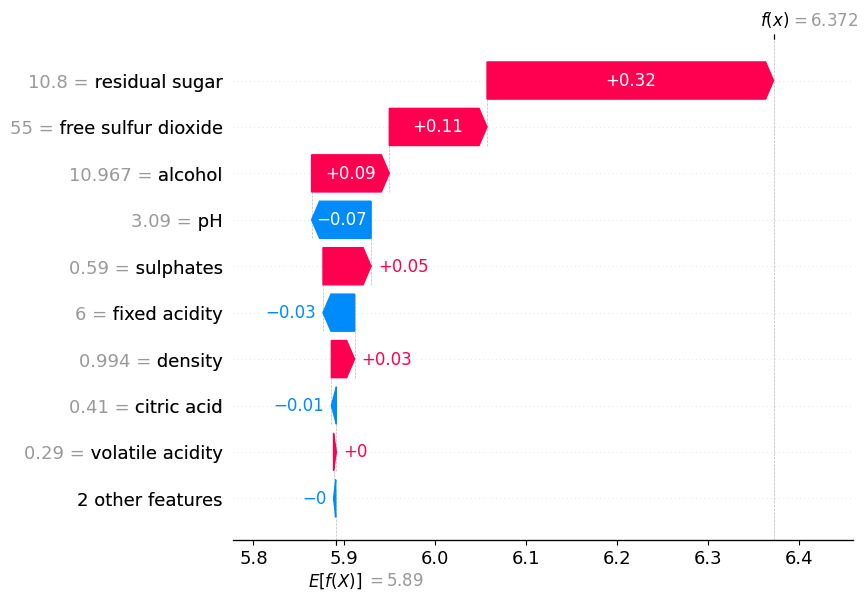

In [13]:
shap.plots.waterfall(shap_values[0])

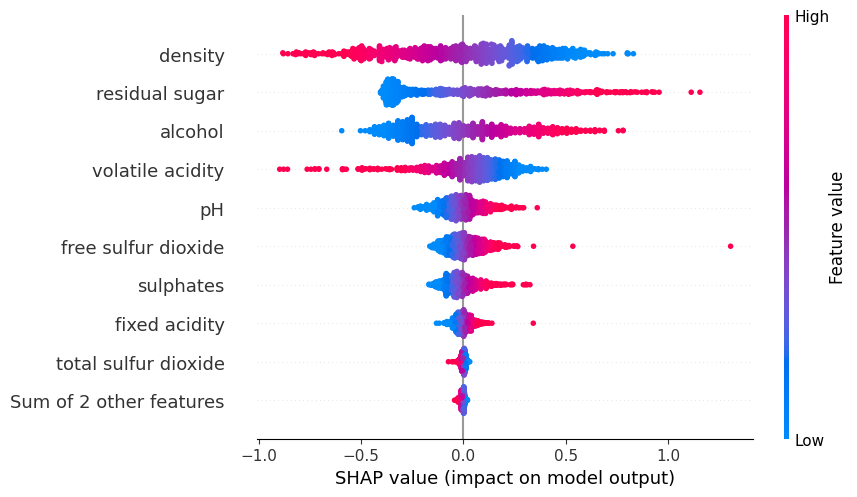

In [14]:
shap.plots.beeswarm(shap_values)

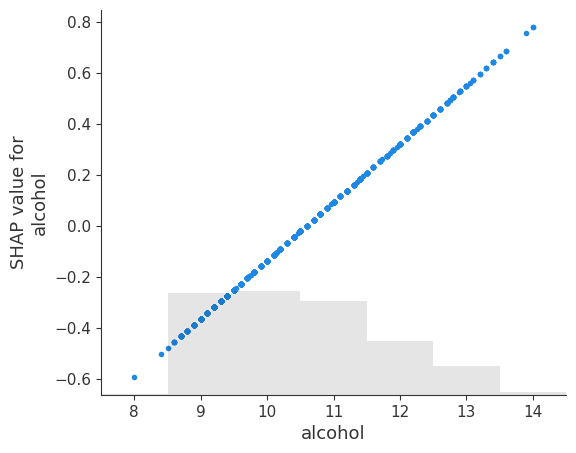

In [15]:
shap.plots.scatter(shap_values[:, 'alcohol'])

In [16]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000
...,...,...,...,...,...,...,...,...,...,...,...
3207,6.8,0.21,0.42,1.20,0.045,24.0,126.0,0.99234,3.09,0.87,10.900000
1539,7.3,0.26,0.49,5.00,0.028,32.0,107.0,0.99360,3.24,0.54,10.800000
964,5.9,0.26,0.21,12.50,0.034,36.0,152.0,0.99720,3.28,0.43,9.500000
168,7.5,0.29,0.31,8.95,0.055,20.0,151.0,0.99680,3.08,0.54,9.300000
